In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('Logistic_X_train.csv',header='infer')
Y_train = pd.read_csv('Logistic_Y_train.csv',header='infer')
X_test = pd.read_csv('Logistic_X_test.csv',header='infer')

In [3]:
X_train = X_train.values
Y_train = Y_train.values.reshape((-1,))
X_test = X_test.values
print(X_train.shape,Y_train.shape)

(2250, 2) (2250,)


In [4]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [5]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        
        np.random.seed(0)
        
        model= {}
        
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_output = None
        
    def forward(self,x):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1)+b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2)+b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3)+b3
        y_ = softmax(z3)
        
        self.activation_output = (a1,a2,y_)
        return y_
    def backward(self,x,y,learning_rate):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_ = self.activation_output
        
        delta3 = y_-y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model['W2'] -= learning_rate*dw2
        self.model['b2'] -= learning_rate*db2
        
        self.model['W3'] -= learning_rate*dw3
        self.model['b3'] -= learning_rate*db3
        
    def predict(self,x):
        y_ = self.forward(x)
        return np.argmax(y_,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1",W1.shape)
        print("A1",a1.shape)
        
        print("W2",W2.shape)
        print("A2",a2.shape)
        
        print("W3",W3.shape)
        print("Y_",y_.shape)

In [6]:
def loss(y_hot,p):
    return -np.mean(y_hot*np.log(p))

def one_hot(y,depth):
    
    m = y.shape[0]
    y_hot = np.zeros((m,depth))
    y_hot[np.arange(m),y] = 1
    
    return y_hot

In [7]:
model = NeuralNetwork(input_size=X_train.shape[1],layers=[15,5],output_size=2)

In [8]:
def train(x,y,model,learning_rate=0.001,maxItr=500,logs=True):
    
    training_loss = []
    
    classes=2
    y_hot = one_hot(y,classes)
    
    for i in range(maxItr):
        
        Y_ = model.forward(x)
        l = loss(y_hot,Y_)
        training_loss.append(l)
        model.backward(x,y_hot,learning_rate)
        
        if(logs and i%20==0):
            print("Epoch %d Loss %.4f"%(i,l))
        
    return training_loss

In [9]:
losses = train(X_train,Y_train,model,0.002,4000)

Epoch 0 Loss 0.1966
Epoch 20 Loss 0.2206
Epoch 40 Loss 0.1363
Epoch 60 Loss 0.0915
Epoch 80 Loss 0.0549
Epoch 100 Loss 0.0509
Epoch 120 Loss 0.0487
Epoch 140 Loss 0.0762
Epoch 160 Loss 0.0475
Epoch 180 Loss 0.0483
Epoch 200 Loss 0.0471
Epoch 220 Loss 0.0490
Epoch 240 Loss 0.0496
Epoch 260 Loss 0.0564
Epoch 280 Loss 0.0699
Epoch 300 Loss 0.0475
Epoch 320 Loss 0.0518
Epoch 340 Loss 0.0518
Epoch 360 Loss 0.0508
Epoch 380 Loss 0.0487
Epoch 400 Loss 0.0495
Epoch 420 Loss 0.0487
Epoch 440 Loss 0.0485
Epoch 460 Loss 0.0483
Epoch 480 Loss 0.0481
Epoch 500 Loss 0.0479
Epoch 520 Loss 0.0477
Epoch 540 Loss 0.0476
Epoch 560 Loss 0.0475
Epoch 580 Loss 0.0474
Epoch 600 Loss 0.0473
Epoch 620 Loss 0.0472
Epoch 640 Loss 0.0471
Epoch 660 Loss 0.0471
Epoch 680 Loss 0.0470
Epoch 700 Loss 0.0469
Epoch 720 Loss 0.0469
Epoch 740 Loss 0.0468
Epoch 760 Loss 0.0468
Epoch 780 Loss 0.0467
Epoch 800 Loss 0.0467
Epoch 820 Loss 0.0466
Epoch 840 Loss 0.0466
Epoch 860 Loss 0.0465
Epoch 880 Loss 0.0465
Epoch 900 Loss 0

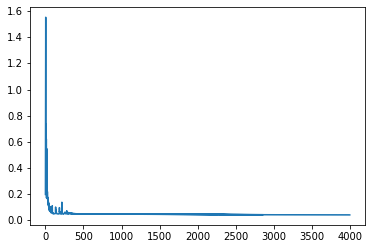

In [10]:
plt.plot(losses)

In [11]:
output = model.predict(X_train)
print(output.shape)

(2250,)


In [12]:
accuracy = np.sum(output==Y_train)/Y_train.shape[0]
print(accuracy)

0.9702222222222222


In [13]:
pred = model.predict(X_test)

In [14]:
dt = pd.DataFrame(pred,columns=['label'])

In [15]:
dt.to_csv('predict.csv',index=False)